In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

## Data Assessment

In [3]:
train.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [4]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [5]:
pd.options.display.max_columns=130

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
264709,406542,0,Cash loans,F,N,N,0,130500.0,263686.5,28107.0,238500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,With parents,0.024610,-10632,-298,-3222.0,-3222,NaN,1,1,0,1,0,0,Drivers,1.0,2,2,THURSDAY,13,0,0,0,0,0,0,Other,NaN,0.253107,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2428.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
162467,288351,0,Cash loans,F,N,N,0,157500.0,755190.0,32125.5,675000.0,Unaccompanied,Pensioner,Higher education,Widow,House / apartment,0.031329,-21265,365243,-6563.0,-3959,NaN,1,0,0,1,0,0,NaN,1.0,2,2,TUESDAY,15,0,0,0,0,0,0,XNA,NaN,0.790706,0.109626,0.1010,0.0471,0.9722,0.6192,0.0319,0.0,0.2069,0.1250,0.1667,0.0462,0.0799,0.1194,0.0116,0.0353,0.1029,0.0488,0.9722,0.6341,0.0322,0.0000,0.2069,0.1250,0.1667,0.0473,0.0872,0.1244,0.0117,0.0374,0.1020,0.0471,0.9722,0.6243,0.0321,0.0,0.2069,0.1250,0.1667,0.0470,0.0812,0.1216,0.0116,0.0361,reg oper account,block of flats,0.1190,Mixed,No,0.0,0.0,0.0,0.0,-2813.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
271252,414454,0,Cash loans,F,N,N,0,67500.0,315000.0,15318.0,315000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008230,-16057,-2152,-5772.0,-4004,NaN,1,1,0,1,0,0,NaN,2.0,2,2,MONDAY,19,0,0,0,0,0,0,Business Entity Type 3,0.397603,0.293489,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1339.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
122893,242487,0

In [8]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
# Number of values for each feature
train.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
EXT_SOURCE_1                  114584
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
LIVINGAREA_MODE                 5301
LIVINGAREA_MEDI                 5281
LIVINGAREA_AVG                  5199
TOTALAREA_MODE                  5116
BASEMENTAREA_MODE               3841
BASEMENTAREA_AVG                3780
DAYS_LAST_PHONE_CHANGE          3773
BASEMENTAREA_MEDI               3772
LANDAREA_MODE                   3563
LANDAREA_MEDI                   3560
LANDAREA_AVG                    3527
NONLIVINGAREA_MODE              3327
NONLIVINGAREA_MEDI              3323
NONLIVINGAREA_AVG               3290
COMMONAREA_MEDI                 3202
COMMONAREA_AVG                  3181
COMMONAREA_MODE                 3128
AMT_INCOME_TOTAL                2548
A

### Target variable

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

0 - all other cases

In [10]:
# Total number of records
n_records = train.shape[0]

# Number of clients with payment difficulties
target_late = len(train[train.TARGET == 1])

# Number of clients other cases (non payment difficulties)
target_good = len(train[train.TARGET == 0])

# Percentage of individuals without payment difficulty
good_percent = round(target_good/n_records*100, ndigits=2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Clients with payment difficulties: {}".format(target_late))
print("Clients without payment difficulties: {}".format(target_good))
print("Percentage of individuals without payment difficulty: {}%".format(good_percent))

Total number of records: 307511
Clients with payment difficulties: 24825
Clients without payment difficulties: 282686
Percentage of individuals without payment difficulty: 91.93%


**We see that the target variable is highly imbalanced.**

That means that accuracy is not a good metric for this dataset. I will be using **ROC AUC** metric (which is how this dataset is evaluated at kaggle). Other metrics we could use is the **F-beta** score.

In [11]:
target_good + target_late == len(train.TARGET)

True

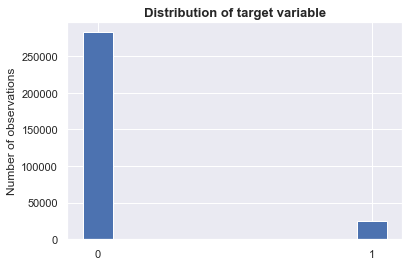

In [12]:
train.TARGET.hist()
plt.title('Distribution of target variable', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Number of observations')
plt.xticks(ticks=(0.05,0.95), labels=('0','1'));

## Missing values

In [13]:
# 67 columns have missing values in the train test
len(train.isnull().sum()[train.isnull().sum()>0])

67

In [14]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing_values', 1 : 'Missing_percentage'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Missing_percentage', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [15]:
pd.options.display.max_rows = 70

### Columns missing values

#### Train set

In [16]:
train_missing_values_col = missing_values_table(train)
train_missing_values_col

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


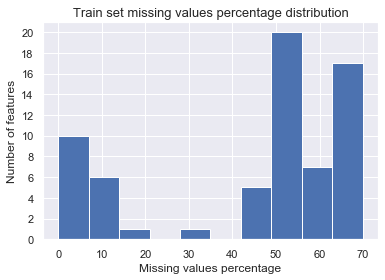

In [17]:
train_missing_values_col['Missing_percentage'].hist()
plt.title('Train set missing values percentage distribution', fontdict={'fontsize': 13})
plt.ylabel('Number of features')
plt.yticks(np.arange(0, 21, step=2))
plt.xlabel('Missing values percentage');

#### Test set

In [18]:
test_missing_values_col = missing_values_table(test)
test_missing_values_col

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


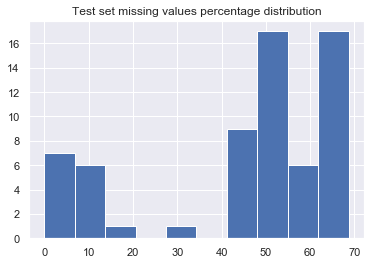

In [19]:
test_missing_values_col['Missing_percentage'].hist()
plt.title('Test set missing values percentage distribution');

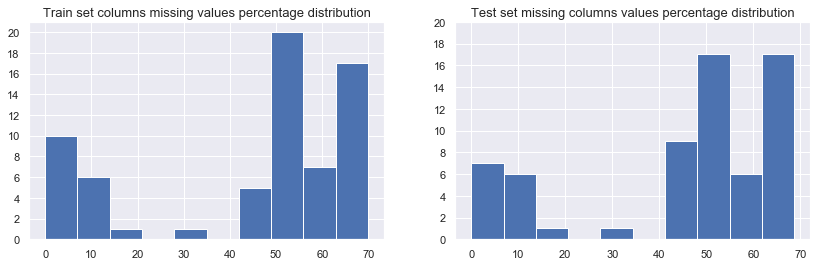

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
train_missing_values_col['Missing_percentage'].hist()
plt.title('Train set columns missing values percentage distribution', fontdict={'fontsize': 13})
plt.yticks(np.arange(0,21,2))
plt.subplot(1,2,2)
test_missing_values_col['Missing_percentage'].hist()
plt.title('Test set missing columns values percentage distribution', fontdict={'fontsize': 13})
plt.yticks(np.arange(0,21,2));

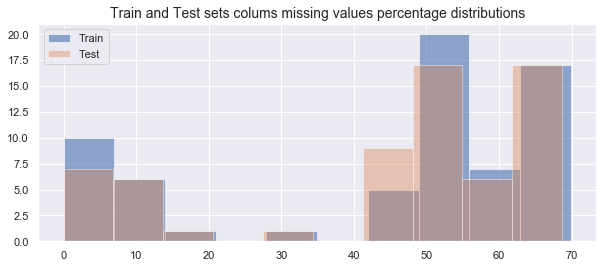

In [21]:
plt.figure(figsize=(10,4))
train_missing_values_col['Missing_percentage'].hist(alpha=0.6)
test_missing_values_col['Missing_percentage'].hist(alpha=0.4)
plt.title('Train and Test sets colums missing values percentage distributions', fontdict={'fontsize': 14})
plt.legend(['Train', 'Test'], loc='upper left');

We see that some columns have many missing values. We also see that the distribution of missing values is similar for the train and test sets.

### Rows missing values

#### Train set missing values

In [22]:
def missing_values_rows(df):
    # Total missing values
    mis_val = df.isnull().sum(axis=1)

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / train.shape[1]

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing_values', 1 : 'Missing_percentage'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'Missing_percentage', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns. \n"   
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " rows that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [23]:
train_missing_values_row = missing_values_rows(train)
train_missing_values_row

Your selected dataframe has 307511 rows and 122 columns. 
There are 298909 rows that have missing values.


,Missing_values,Missing_percentage
69707,61,50.0
269492,61,50.0
269786,61,50.0
185713,61,50.0
133770,61,50.0
244833,61,50.0
116937,61,50.0
150206,61,50.0
197736,61,50.0
36899,60,49.2


In [24]:
test_missing_values_row = missing_values_rows(test)
test_missing_values_row

Your selected dataframe has 48744 rows and 121 columns. 
There are 47005 rows that have missing values.


,Missing_values,Missing_percentage
45915,61,50.0
11311,58,47.5
9149,58,47.5
46262,58,47.5
43634,58,47.5
3220,58,47.5
23933,58,47.5
8612,58,47.5
8354,57,46.7
4811,57,46.7


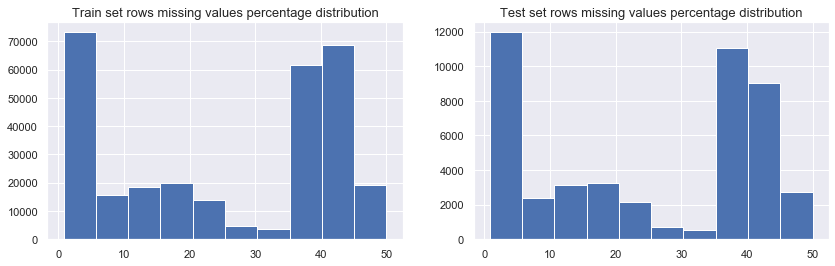

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
train_missing_values_row['Missing_percentage'].hist()
plt.title('Train set rows missing values percentage distribution', fontdict={'fontsize': 13})
plt.subplot(1,2,2)
test_missing_values_row['Missing_percentage'].hist()
plt.title('Test set rows missing values percentage distribution', fontdict={'fontsize': 13});

### Create clean dataset

In [26]:
train_clean = train.copy()
test_clean = test.copy()

### Column types

In [27]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [28]:
test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

### Object column features

In [29]:
# number of unique classes for categorical features
train.select_dtypes('object').nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

In [30]:
# Unique values for each categorical feature
for i in (train.select_dtypes('object').nunique().sort_values(ascending=False)).index:
    print(i, '\n', train[i].unique(), '\n')

ORGANIZATION_TYPE 
 ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Industry: type 6'] 

OCCUPATION_TYPE 
 ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'S

I will later create dummy variables for the categorical features.

In [31]:
# the following categorical features have missing values
missing_values_table(train_clean[train_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing_values,Missing_percentage
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


There are many missing values in some features. Since I don't know the importance of them I will try to avoid removing columns and rows. There are algorithms like XGBoost that work well with missing values. I could also impute the most frequent value (mode), but that does not sound as a good practice, i.e. to randomly assign the mode; also there are many missing values so that could be misleading and create bias.

## Handle missing values

### Categorical features

I will create a new value called 'missing' to fill in the NaN values.

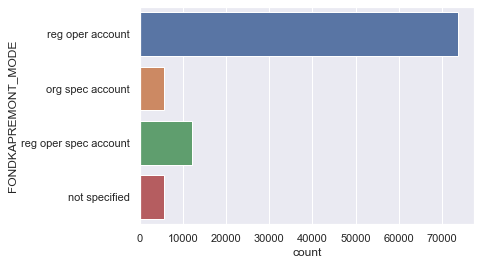

In [32]:
sns.countplot(y=train_clean['FONDKAPREMONT_MODE']);

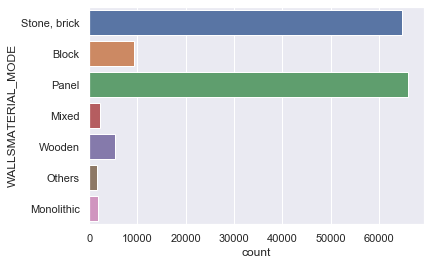

In [33]:
sns.countplot(y=train_clean['WALLSMATERIAL_MODE']);

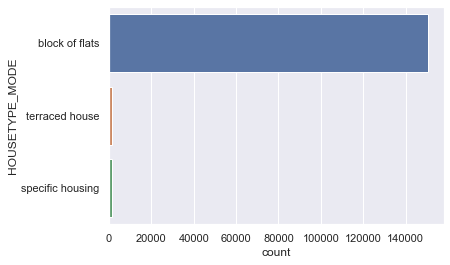

In [34]:
sns.countplot(y=train_clean['HOUSETYPE_MODE']);

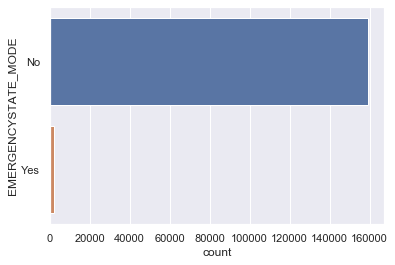

In [35]:
sns.countplot(y=train_clean['EMERGENCYSTATE_MODE']);

In [36]:
train_clean['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [37]:
2328/(2328+159428)

0.014392047281090036

Countplot of emergency state mode and target variable.

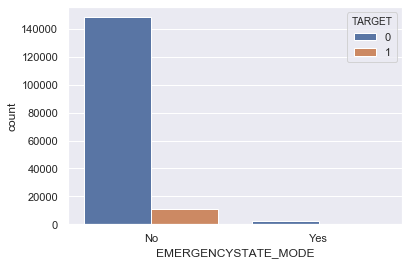

In [38]:
sns.countplot(x='EMERGENCYSTATE_MODE', hue='TARGET', data=train_clean);

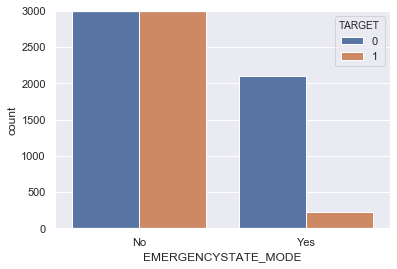

In [39]:
# Zoom-in
sns.countplot(x='EMERGENCYSTATE_MODE', hue='TARGET', data=train_clean)
plt.ylim(0,3000);

It looks like the distributions between No and Yes and the Target variable are quite similar. Thus, imputing the mode, which is 'No', should not really affect the analysis.

However, I want also to check the distribution of the missing values in relation with the target as well.

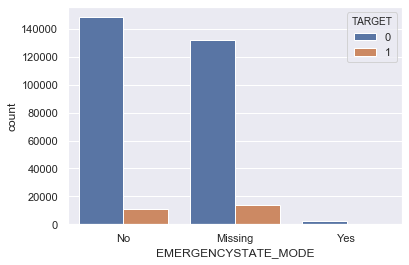

In [40]:
sns.countplot(x=train_clean['EMERGENCYSTATE_MODE'].fillna('Missing'), hue=train_clean['TARGET']);

We see the the distribution is similar between Missing and No, but not exactly. Although I could impute the mode without really causing an issue in the analysis, I will replace NaN with Missing as the rest of the categorical features.

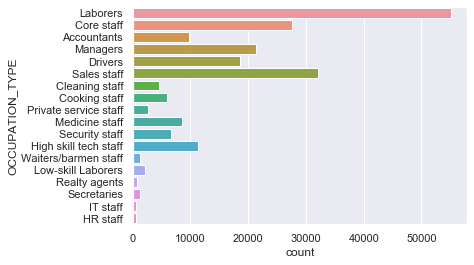

In [41]:
sns.countplot(y=train_clean['OCCUPATION_TYPE']);

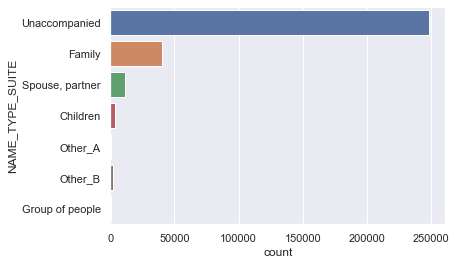

In [42]:
sns.countplot(y=train_clean['NAME_TYPE_SUITE']);

There are about 1200 missing values for the NAME_TYPE_SUITE or 0.4% of the dataset. I could also drop these records.

#### Replace NaN values with Missing

In [43]:
train_clean['FONDKAPREMONT_MODE'].fillna('Missing', inplace=True)
train_clean['WALLSMATERIAL_MODE'].fillna('Missing', inplace=True)
train_clean['HOUSETYPE_MODE'].fillna('Missing', inplace=True)
train_clean['EMERGENCYSTATE_MODE'].fillna('Missing', inplace=True)
train_clean['OCCUPATION_TYPE'].fillna('Missing', inplace=True)
train_clean['NAME_TYPE_SUITE'].fillna('Missing', inplace=True)

In [44]:
# Categorical missing values have now been treated
missing_values_table(train_clean[train_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing_values,Missing_percentage


#### Test set

Perform the same encoding to the test set.

In [45]:
missing_values_table(test_clean[test_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing_values,Missing_percentage
FONDKAPREMONT_MODE,32797,67.3
WALLSMATERIAL_MODE,23893,49.0
HOUSETYPE_MODE,23619,48.5
EMERGENCYSTATE_MODE,22209,45.6
OCCUPATION_TYPE,15605,32.0
NAME_TYPE_SUITE,911,1.9


In [46]:
test_clean['FONDKAPREMONT_MODE'].fillna('Missing', inplace=True)
test_clean['WALLSMATERIAL_MODE'].fillna('Missing', inplace=True)
test_clean['HOUSETYPE_MODE'].fillna('Missing', inplace=True)
test_clean['EMERGENCYSTATE_MODE'].fillna('Missing', inplace=True)
test_clean['OCCUPATION_TYPE'].fillna('Missing', inplace=True)
test_clean['NAME_TYPE_SUITE'].fillna('Missing', inplace=True)

In [47]:
missing_values_table(test_clean[test_clean.select_dtypes('object').nunique().index])

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing_values,Missing_percentage


### Numerical Features

In [48]:
missing_values_table(train_clean.select_dtypes(include=np.number)).head(10)

Your selected dataframe has 106 columns.
There are 61 columns that have missing values.


,Missing_values,Missing_percentage
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
FLOORSMIN_MEDI,208642,67.8


#### ...

In [49]:
train_clean.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [50]:
test_clean.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

#### Number of children

In [51]:
# Here we see some cases with families with more than 10 children up to 19.
# Might be the case that 2 families have 19 children. I will leave it as it is.
train_clean.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [52]:
test_clean.CNT_CHILDREN.value_counts()

0     34685
1      9504
2      3949
3       535
4        49
5        12
8         3
6         3
11        2
20        1
7         1
Name: CNT_CHILDREN, dtype: int64

#### Age

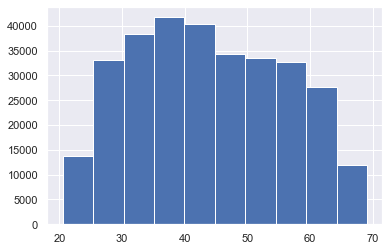

In [53]:
# Age in years looks correct - no outliers
((train_clean.DAYS_BIRTH *(-1))/365).hist();

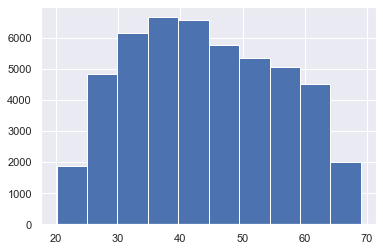

In [54]:
((test_clean.DAYS_BIRTH *(-1))/365).hist();

#### Years employed

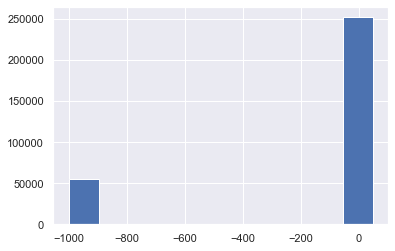

In [55]:
# Something is not right in years of employment
(train_clean.DAYS_EMPLOYED * (-1) / 365).hist();

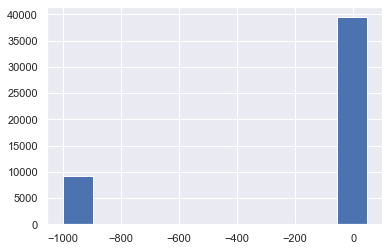

In [56]:
(test_clean.DAYS_EMPLOYED * (-1) / 365).hist();

In [57]:
((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800).sum()

55374

It looks like more than 55,000 values at the train test are above 800 years of employment. Similar to the test set.

Let's check the target variable for these erroneous cases:

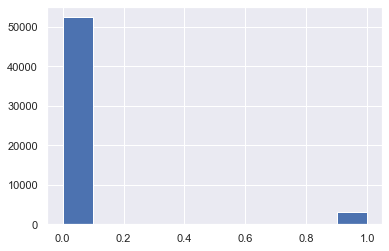

In [58]:
train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800)].TARGET.hist();

In [59]:
# Percentage of defaults for erroneous cases is 5.4%
err_days_employed = train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) < -800)]
round((err_days_employed.TARGET==1).sum()/len(err_days_employed.TARGET)*100, 2)

5.4

Target variable for the rest of the cases:

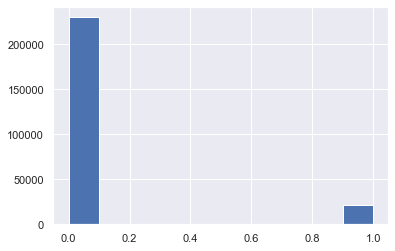

In [60]:
train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) > -800)].TARGET.hist();

In [61]:
# Percentage of defaults for rest of cases cases is 8.66%
ok_days_employed = train_clean[((train_clean.DAYS_EMPLOYED * (-1) / 365) > -800)]
round((ok_days_employed.TARGET==1).sum()/len(ok_days_employed.TARGET)*100, 2)

8.66

It looks like the erroneous cases for days of employment default in a smaller percentage compared to the correct records.

I will replace the erroneous values with null.

In [62]:
train_clean.loc[err_days_employed.index, 'DAYS_EMPLOYED'] = np.nan

In [63]:
train_clean['DAYS_EMPLOYED'].isnull().sum()

55374

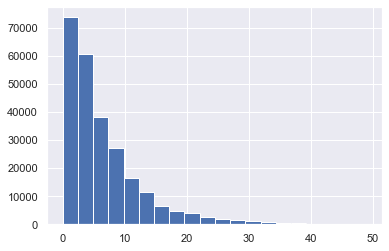

In [64]:
(train_clean['DAYS_EMPLOYED'] * (-1) / 365).hist(bins=20);

In [65]:
# Test set
err_days_employed_test = test_clean[((test_clean.DAYS_EMPLOYED * (-1) / 365) < -800)]
len(err_days_employed_test)

9274

In [66]:
test_clean.loc[err_days_employed_test.index, 'DAYS_EMPLOYED'] = np.nan

In [67]:
test_clean['DAYS_EMPLOYED'].isnull().sum()

9274

#### Car age

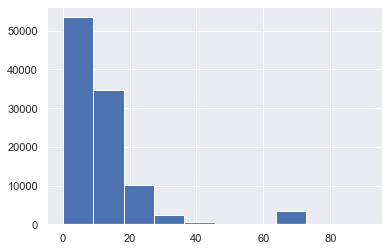

In [68]:
train_clean.OWN_CAR_AGE.hist();

In [69]:
(train_clean.OWN_CAR_AGE > 50).sum()

3361

Car age beoyond 50 years does not really look correct. Unless the car is an old model and the user is a collector. Let's check the target variable.

In [70]:
(train_clean.OWN_CAR_AGE > 50).sum()/len(train_clean)

0.010929690320021073

If users with old cars are collectors, then about 1% of the dataset records are car collectors. That number is high or it might be correct, if the assumption that these are old cars is correct. I will not perform any changes in the car age feature and assume that these are valid car ages.

In [71]:
(test_clean.OWN_CAR_AGE > 50).sum()

463

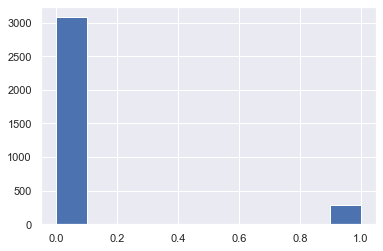

In [72]:
train_clean[train_clean.OWN_CAR_AGE>50].TARGET.hist();

In [73]:
# Percentage of defaults for likely erroneous cases is 8.36%
err_car_age = train_clean[(train_clean.OWN_CAR_AGE > 50)]
round((err_car_age.TARGET==1).sum()/len(err_car_age.TARGET)*100, 2)

8.36

In [74]:
# Percentage of defaults for normal cases is 7.21%
ok_car_age = train_clean[(train_clean.OWN_CAR_AGE < 50)]
round((ok_car_age.TARGET==1).sum()/len(ok_car_age.TARGET)*100, 2)

7.21

Not really a big difference in defaults. For the cars above 50 years old the default rate is a bit higher than the rest cases. There are already many missing values for this feature.

In [75]:
# missing
train_clean.OWN_CAR_AGE.isnull().sum()

202929

In [76]:
# not missing
train_clean.OWN_CAR_AGE.notna().sum()

104582

In [77]:
#train_clean.loc[err_car_age.index, 'OWN_CAR_AGE'] = np.nan

In [78]:
#(train_clean.OWN_CAR_AGE > 50).sum()

In [79]:
# Test set
#err_car_age_test = test_clean[(test_clean.OWN_CAR_AGE > 50)]
#test_clean.loc[err_car_age_test.index, 'OWN_CAR_AGE'] = np.nan

In [80]:
#(test_clean.OWN_CAR_AGE > 50).sum()

### Impute median to missing values

Notes: It is better to check the features. For example, the binary ones (or with features with a small number of values) I do not think it is a good strategy to impute the median, especially for the cases where there are many missing values. Maybe is better to assing another value to denote that is missing.

For now I will impute the median to all numeric features with missing values.

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
train_missing_values_col_numeric = missing_values_table(train_clean.select_dtypes(include=np.number))

Your selected dataframe has 106 columns.
There are 62 columns that have missing values.


In [83]:
imp_median = SimpleImputer(strategy='median')

In [84]:
train_clean[train_missing_values_col_numeric.index] = imp_median.fit_transform(train_clean[train_missing_values_col_numeric.index])

In [85]:
train_clean.isnull().sum().any()

False

In [86]:
test_missing_values_col_numeric = missing_values_table(test_clean.select_dtypes(include=np.number))

Your selected dataframe has 105 columns.
There are 59 columns that have missing values.


In [87]:
test_clean[test_missing_values_col_numeric.index] = imp_median.fit_transform(test_clean[test_missing_values_col_numeric.index])

In [88]:
test_clean.isnull().sum().any()

False

## Data engineering

Turn negative numbers to positives and also days to years.

In [89]:
features_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

In [90]:
train_clean[features_negative] = train_clean[features_negative] * (-1) / 365
test_clean[features_negative] = test_clean[features_negative] * (-1) / 365

In [91]:
train_clean[features_negative].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,25.920548,1.745205,9.994521,5.808219,3.106849
1,45.931507,3.254795,3.249315,0.797260,2.268493
2,52.180822,0.616438,11.671233,6.934247,2.232877
3,52.068493,8.326027,26.939726,6.676712,1.690411
4,54.608219,8.323288,11.810959,9.473973,3.030137


In [92]:
train_clean[features_negative].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,6.168784,13.660604,8.203294,2.637967
std,11.956133,5.852585,9.651743,4.135481,2.265225
min,20.517808,-0.000000,-0.000000,0.000000,-0.000000
25%,34.008219,2.556164,5.506849,4.712329,0.750685
50%,43.150685,4.515068,12.339726,8.915068,2.073973
75%,53.923288,7.561644,20.491781,11.778082,4.301370
max,69.120548,49.073973,67.594521,19.717808,11.758904


## Align train and test sets

I will keep those columns that are present in both datasets.

In [93]:
train_ids = train_clean['SK_ID_CURR']
test_ids = test_clean['SK_ID_CURR']

In [94]:
# Drop ID column
train_clean.drop('SK_ID_CURR', axis=1, inplace=True)

In [95]:
train_clean.shape, test_clean.shape

((307511, 121), (48744, 121))

In [96]:
train_target = train_clean['TARGET']
train_target.shape

(307511,)

In [147]:
train_clean, test_clean = train_clean.align(test_clean, join='inner', axis=1)

In [98]:
#train_clean.shape, test_clean.shape

In [99]:
# add target back in train dataset
#train_clean['TARGET'] = train_target

In [100]:
#train_clean.shape, test_clean.shape

## Exploratory Data Analysis (EDA)

In [101]:
train_clean.dtypes.value_counts()

float64    68
int64      37
object     16
dtype: int64

In [102]:
train_numeric = train_clean.select_dtypes(include=np.number)
train_object = train_clean.select_dtypes(exclude=np.number)

train_discrete_numeric = [attr for attr in train_numeric.columns if len(train_numeric[attr].unique())<25]
train_discrete_object = [attr for attr in train_object.columns if len(train_object[attr].unique())<25]

train_continuous = [attr for attr in train_numeric.columns if len(train_numeric[attr].unique())>25]

In [103]:
len(train_numeric.columns), len(train_object.columns)

(105, 16)

In [104]:
len(train_discrete_numeric), len(train_discrete_object)

(45, 15)

### Numeric data - Correlation with target

In [105]:
corrs = train_numeric.corr().sort_values('TARGET', ascending=False)

In [106]:
corrs.head(10)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,-0.078239,-0.063368,-0.041975,-0.051457,0.015982,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.098887,-0.160295,-0.155892,-0.026734,-0.017634,-0.004665,-0.011281,-0.016194,-0.035853,-0.015984,-0.039385,-0.021158,-0.012047,-0.019262,-0.029464,-0.005910,-0.018187,-0.025418,-0.016136,-0.004061,-0.010648,-0.015238,-0.034220,-0.013515,-0.038377,-0.020147,-0.011860,-0.018829,-0.027884,-0.004859,-0.017984,-0.026841,-0.017255,-0.004872,-0.011364,-0.016266,-0.035552,-0.015734,-0.039157,-0.020995,-0.012269,-0.019138,-0.029359,-0.005650,-0.018094,-0.030214,0.009447,0.032394,0.009337,0.031401,-0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
REGION_RATING_CLIENT_W_CITY,0.060893,0.024781,-0.091735,-0.110915,-0.141674,-0.112185,-0.531535,-0.008073,0.003816,-0.074038,0.007737,0.046774,0.000113,-0.034712,0.013414,0.013651,-0.079134,-0.050778,0.030778,0.950842,1.000000,-0.264815,-0.041143,-0.133423,-0.140771,0.045669,0.028081,-0.002805,-0.077968,-0.288013,-0.011342,-0.155891,-0.068468,0.007031,0.023498,-0.105003,-0.220915,-0.037128,-0.225703,-0.160808,0.000194,-0.135251,-0.164615,-0.030544,-0.094437,-0.136500,-0.050531,0.007510,0.029465,-0.092033,-0.203495,-0.017893,-0.213763,-0.150003,0.007114,-0.122116,-0.142948,-0.025346,-0.080616,-0.154120,-0.065930,0.006986,0.024136,-0.103507,-0.217124,-0.034627,-0.222975,-0.158916,0.001188,-0.133274,-0.162136,-0.029103,-0.089873,-0.166787,0.030727,0.014291,0.030355,0.017371,-0.025717,-0.000408,0.067083,-0.005587,-0.015614,0.019870,0.001000,-0.087861,-0.038914,-0.001655,-0.013152,-0.000160,-0.032760,-0.037711,-0.009253,-0.005430,-0.004193,-0.013672,-0.001530,0.002609,-0.001501,0.005913,-0.001676,0.001353,-0.061618,0.005044,0.010670
REGION_RATING_CLIE

In [107]:
corrs.tail(10)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
FLOORSMAX_AVG,-0.039385,-0.016865,0.068419,0.089300,0.111618,0.094610,0.276557,0.004346,0.005890,-0.015464,0.011191,-0.039893,-0.003013,0.013698,-0.031541,-0.010960,0.068566,0.046463,-0.020100,-0.208119,-0.225703,0.103584,-0.001011,0.014581,0.027807,-0.077235,-0.134419,-0.103957,0.062126,0.124479,0.005118,0.629150,0.316517,0.082607,0.403051,0.357653,0.708917,0.108458,1.000000,0.602416,0.230058,0.500168,0.637783,0.124264,0.299051,0.599239,0.291421,0.071155,0.389698,0.339966,0.687615,0.074528,0.986610,0.582848,0.218431,0.486146,0.606357,0.113926,0.276138,0.627287,0.313215,0.082415,0.402023,0.357131,0.705493,0.103438,0.997260,0.600106,0.230345,0.499965,0.634883,0.122157,0.293493,0.648137,-0.030716,-0.021657,-0.030465,-0.021816,0.013634,0.001739,-0.062095,0.001717,0.007986,-0.006282,0.002482,0.067191,0.029075,-0.000008,0.019003,0.001773,0.025328,0.031456,0.010647,0.012578,0.002570,0.011298,0.001859,-0.000544,-0.003757,0.003795,0.004203,0.001425,0.048362,0.000974,-0.012740
AMT_GOODS_PRICE,-0.039623,-0.001856,0.159632,0.986734,0.774837,1.000000,0.103519,0.053510,0.093049,-0.011546,0.009289,-0.039778,0.001398,0.063412,0.000787,0.020696,0.041921,0.017031,0.061138,-0.103759,-0.112185,0.062269,0.026119,0.053146,0.052829,-0.027206,-0.020348,-0.001334,0.119068,0.138997,0.040440,0.058741,0.035806,0.002620,0.024686,0.039207,0.081039,0.019001,0.094610,0.054065,0.016949,0.045911,0.068040,0.015701,0.044217,0.053560,0.030538,0.001327,0.022231,0.035242,0.076674,0.013024,0.091864,0.051096,0.014706,0.041826,0.062153,0.013293,0.040926,0.057935,0.034481,0.002360,0.024450,0.038740,0.079931,0.017900,0.094106,0.053667,0.016464,0.045019,0.067199,0.015025,0.042903,0.070261,0.000788,-0.021949,0.000806,-0.024245,0.076294,0.010775,0.075040,0.001115,-0.005995,-0.050169,-0.000724,0.080511,0.022477,-0.002138,0.035137,0.004067,0.052369,0.048760,0.032939,0.058325,0.012142,0.032767,0.020284,0.031644,-0.014426,-0.001743,0.005442,0.001880,0.057337,0.020811,-0.038979
DAYS_REGISTRATION,-0.041975,-0.183395,-0.027805,-0.009621,-0.038514,-0.011546,0.053820,0.331912,0.114179,1.000000,0.101896,-0.00415

In [108]:
corrs_high = corrs[(corrs.TARGET>0.05) | (corrs.TARGET<-0.05)]
corrs_high

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,-0.078239,-0.063368,-0.041975,-0.051457,0.015982,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.098887,-0.160295,-0.155892,-0.026734,-0.017634,-0.004665,-0.011281,-0.016194,-0.035853,-0.015984,-0.039385,-0.021158,-0.012047,-0.019262,-0.029464,-0.005910,-0.018187,-0.025418,-0.016136,-0.004061,-0.010648,-0.015238,-0.034220,-0.013515,-0.038377,-0.020147,-0.011860,-0.018829,-0.027884,-0.004859,-0.017984,-0.026841,-0.017255,-0.004872,-0.011364,-0.016266,-0.035552,-0.015734,-0.039157,-0.020995,-0.012269,-0.019138,-0.029359,-0.005650,-0.018094,-0.030214,0.009447,0.032394,0.009337,0.031401,-0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
REGION_RATING_CLIENT_W_CITY,0.060893,0.024781,-0.091735,-0.110915,-0.141674,-0.112185,-0.531535,-0.008073,0.003816,-0.074038,0.007737,0.046774,0.000113,-0.034712,0.013414,0.013651,-0.079134,-0.050778,0.030778,0.950842,1.000000,-0.264815,-0.041143,-0.133423,-0.140771,0.045669,0.028081,-0.002805,-0.077968,-0.288013,-0.011342,-0.155891,-0.068468,0.007031,0.023498,-0.105003,-0.220915,-0.037128,-0.225703,-0.160808,0.000194,-0.135251,-0.164615,-0.030544,-0.094437,-0.136500,-0.050531,0.007510,0.029465,-0.092033,-0.203495,-0.017893,-0.213763,-0.150003,0.007114,-0.122116,-0.142948,-0.025346,-0.080616,-0.154120,-0.065930,0.006986,0.024136,-0.103507,-0.217124,-0.034627,-0.222975,-0.158916,0.001188,-0.133274,-0.162136,-0.029103,-0.089873,-0.166787,0.030727,0.014291,0.030355,0.017371,-0.025717,-0.000408,0.067083,-0.005587,-0.015614,0.019870,0.001000,-0.087861,-0.038914,-0.001655,-0.013152,-0.000160,-0.032760,-0.037711,-0.009253,-0.005430,-0.004193,-0.013672,-0.001530,0.002609,-0.001501,0.005913,-0.001676,0.001353,-0.061618,0.005044,0.010670
REGION_RATING_CLIE

In [109]:
corrs_high[corrs_high.index]

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2
TARGET,1.000000,0.060893,0.058899,0.050994,-0.051457,-0.055218,-0.063368,-0.078239,-0.098887,-0.155892,-0.160295
REGION_RATING_CLIENT_W_CITY,0.060893,1.000000,0.950842,0.028081,0.007737,-0.025717,0.003816,-0.008073,-0.077968,-0.011342,-0.288013
REGION_RATING_CLIENT,0.058899,0.950842,1.000000,0.008360,0.005103,-0.026022,0.005360,-0.009361,-0.078013,-0.011724,-0.292621
REG_CITY_NOT_WORK_CITY,0.050994,0.028081,0.008360,1.000000,-0.099354,-0.046787,-0.089434,-0.242401,-0.126564,-0.069288,-0.075868
DAYS_ID_PUBLISH,-0.051457,0.007737,0.005103,-0.099354,1.000000,0.088577,0.044741,0.272691,0.089020,0.111864,0.050881
DAYS_LAST_PHONE_CHANGE,-0.055218,-0.025717,-0.026022,-0.046787,0.088577,1.000000,0.130041,0.082940,0.087115,0.063544,0.195460
DAYS_EMPLOYED,-0.063368,0.003816,0.005360,-0.089434,0.044741,0.130041,1.000000,0.183299,0.131939,0.087850,0.085817
DAYS_BIRTH,-0.078239,-0.008073,-0.009361,-0.242401,0.272691,0.082940,0.183299,1.000000,0.362185,0.178527,0.091947
EXT_SOURCE_1,-0.098887,-0.077968,-0.078013,-0.126564,0.089020,0.087115,0.131939,0.362185,1.000000,0.109100,0.134993
EXT_SOURCE_3,-0.155892,-0.011342,-0.011724,-0.069288,0.111864,0.063544,0.087850,0.178527,0.109100,1.000000,0.094147


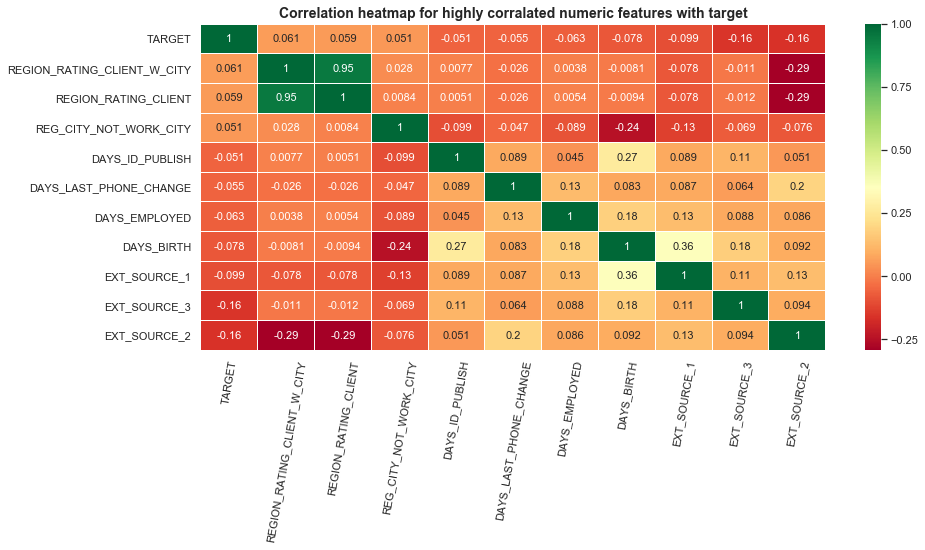

In [110]:
cmap = 'viridis'
cmap = 'RdYlGn'
plt.figure(figsize=(14,6))

sns.heatmap(corrs_high[corrs_high.index],
           linewidths=0.01, linecolor='white', annot_kws = {'size':11}, annot=True, cmap=cmap)

plt.title('Correlation heatmap for highly corralated numeric features with target',
          fontdict={'fontsize':14, 'fontweight':'bold'})

plt.xticks(rotation=80);

In [111]:
train_clean[corrs_high.index].head(10)

,TARGET,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2
0,1,2,2,0,5.808219,3.106849,1.745205,25.920548,0.083037,0.139376,0.262949
1,0,1,1,0,0.797260,2.268493,3.254795,45.931507,0.311267,0.535276,0.622246
2,0,2,2,0,6.934247,2.232877,0.616438,52.180822,0.505998,0.729567,0.555912
3,0,2,2,0,6.676712,1.690411,8.326027,52.068493,0.505998,0.535276,0.650442
4,0,2,2,1,9.473973,3.030137,8.323288,54.608219,0.505998,0.535276,0.322738
5,0,2,2,0,1.306849,6.947945,4.350685,46.413699,0.505998,0.621226,0.354225
6,0,2,2,0,1.695890,4.279452,8.575342,37.747945,0.774761,0.492060,0.724000
7,0,3,3,1,6.517808,2.931507,1.230137,51.643836,0.505998,0.540654,0.714279
8,0,2,2,0,9.627397,-0.000000,4.515068,55.065753,0.587334,0.751724,0.205747
9,0,2,2,0,10.936986,4.583562,5.531507,39.641096,0.505998,0.535276,0.746644


#### Birth Year

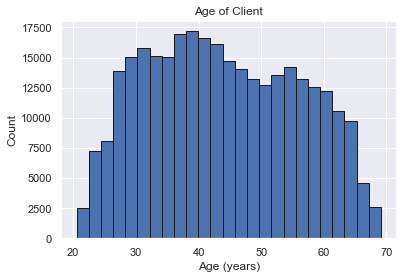

In [112]:
# Set the style of plots
#plt.style.use('fivethirtyeight')

# Distribution of ages
plt.hist(train_clean['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count');

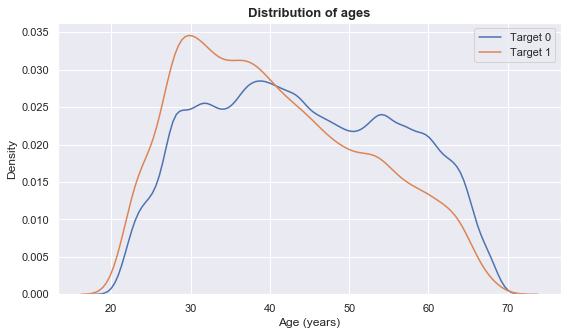

In [113]:
plt.figure(figsize=(9,5))
sns.kdeplot(train_clean[train_clean.TARGET==0].DAYS_BIRTH, label='Target 0')
sns.kdeplot(train_clean[train_clean.TARGET==1].DAYS_BIRTH, label='Target 1')
plt.title('Distribution of ages', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Age (years)')
plt.ylabel('Density');

Although the correlation with age is small, it looks like younger clients more likely defualt than older ones (the distribution of ages for clients with payment dificulties is left skewed to younger ages).

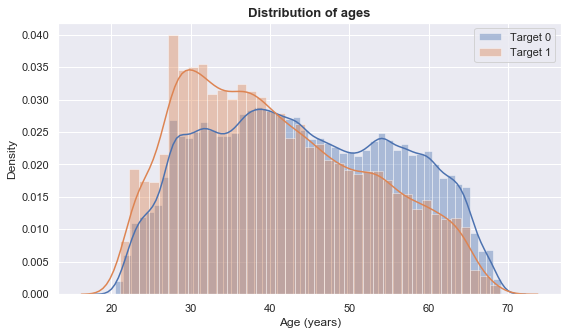

In [114]:
plt.figure(figsize=(9,5))
sns.distplot(train_clean[train_clean.TARGET==0].DAYS_BIRTH, label='Target 0')
sns.distplot(train_clean[train_clean.TARGET==1].DAYS_BIRTH, label='Target 1')
plt.title('Distribution of ages', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend();

#### External sources

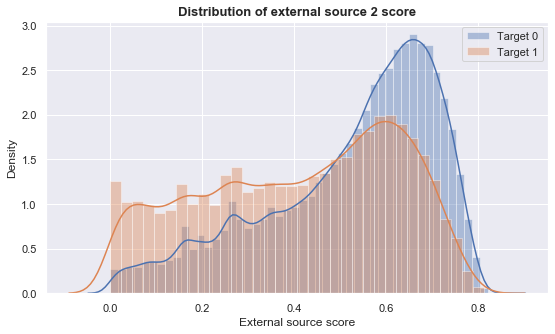

In [115]:
plt.figure(figsize=(9,5))
sns.distplot(train_clean[train_clean.TARGET==0].EXT_SOURCE_2, label='Target 0')
sns.distplot(train_clean[train_clean.TARGET==1].EXT_SOURCE_2, label='Target 1')
plt.title('Distribution of external source 2 score', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xlabel('External source score')
plt.ylabel('Density')
plt.legend();

### Discrete Object Data

In [116]:
len(train_discrete_object)

15

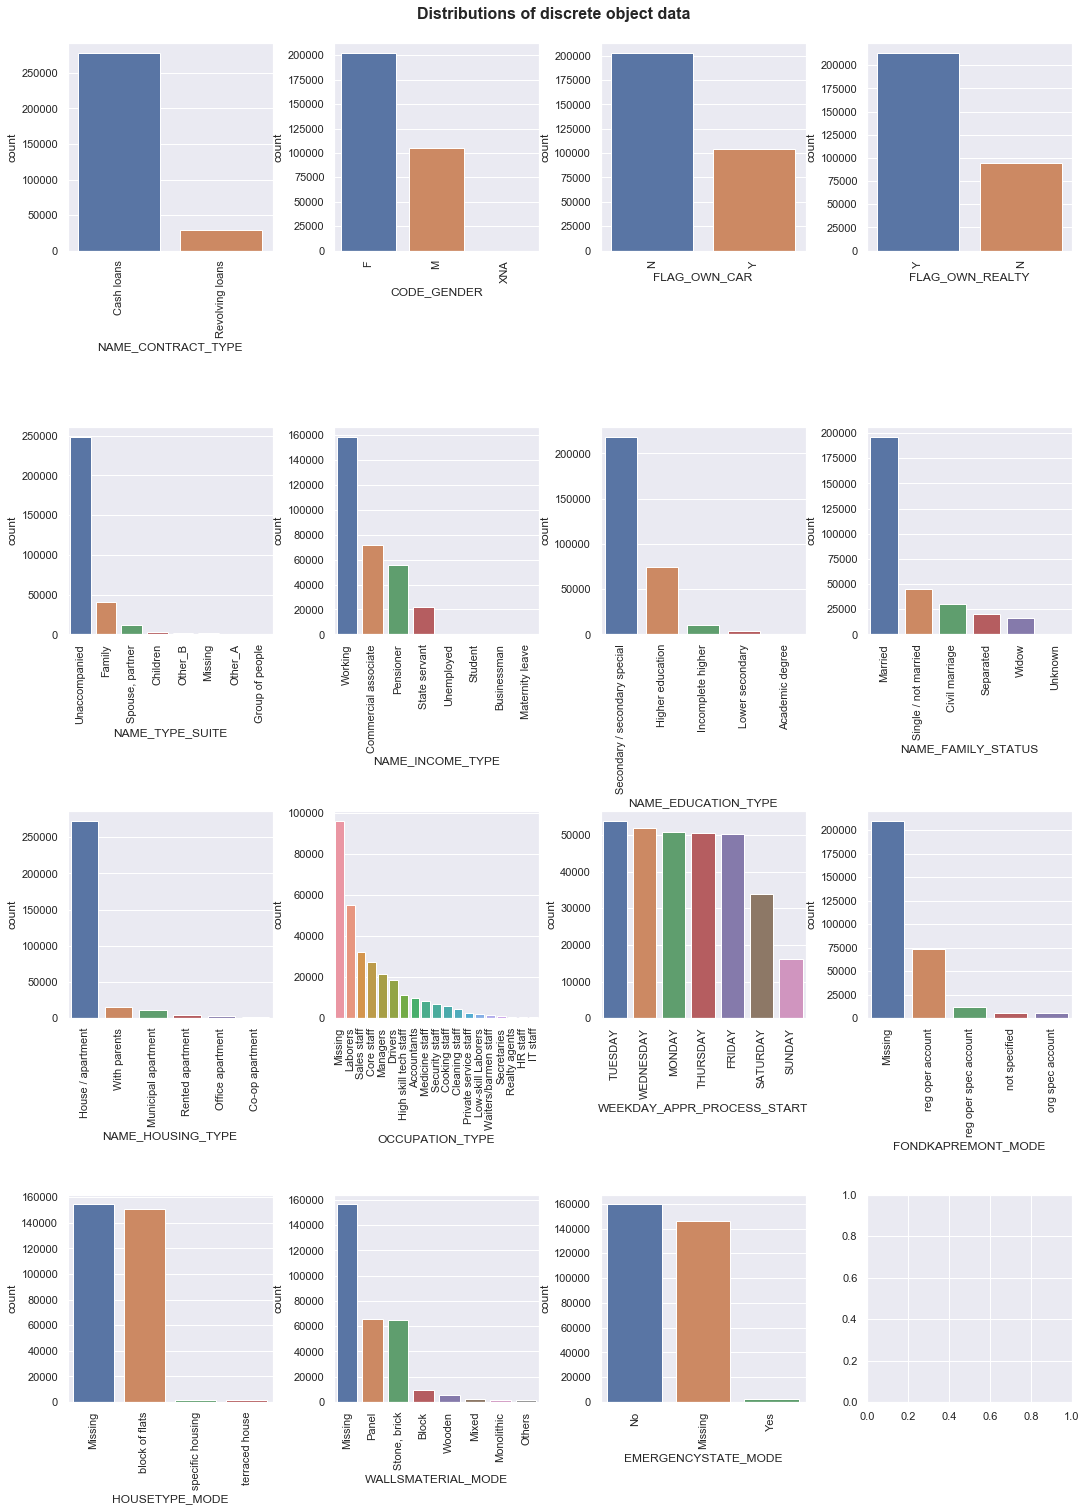

In [117]:
i = j = k = 0
fig, ax = plt.subplots(4,4, figsize=(18,25))
fig.suptitle('Distributions of discrete object data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.85, wspace=0.3)
for attr in train_discrete_object:
    sns.countplot(x=attr, data=train_clean, order=train_clean[attr].value_counts().index, ax=ax[i,j])
    ax[i,j].tick_params('x', labelrotation=90)
    if j==3:
        i+=1
        j=0
    else:
        j+=1
    k+=1

In [118]:
aa = train_clean[train_object.columns]
aa.loc[aa.index, 'TARGET'] = 0
aa.loc[aa.index, 'TARGET'] = train_target
aa.head()

C:\Users\georg\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\georg\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,Missing,Missing,Missing,Missing,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,Missing,Missing,Missing,Missing,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,Missing,Missing,Missing,Missing,0


In [119]:
aa.shape

(307511, 17)

In [120]:
#aa = train_clean[['TARGET'] + train_discrete_object]
#aa.head(1)

In [121]:
aa.groupby('CODE_GENDER').mean()

,TARGET
CODE_GENDER,
F,0.069993
M,0.101419
XNA,0.000000


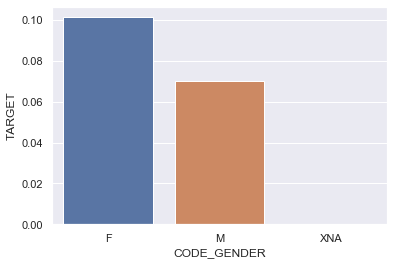

In [122]:
sns.barplot(x=aa.groupby('CODE_GENDER').mean().index, y=aa.groupby('CODE_GENDER').mean().TARGET.sort_values(ascending=False));

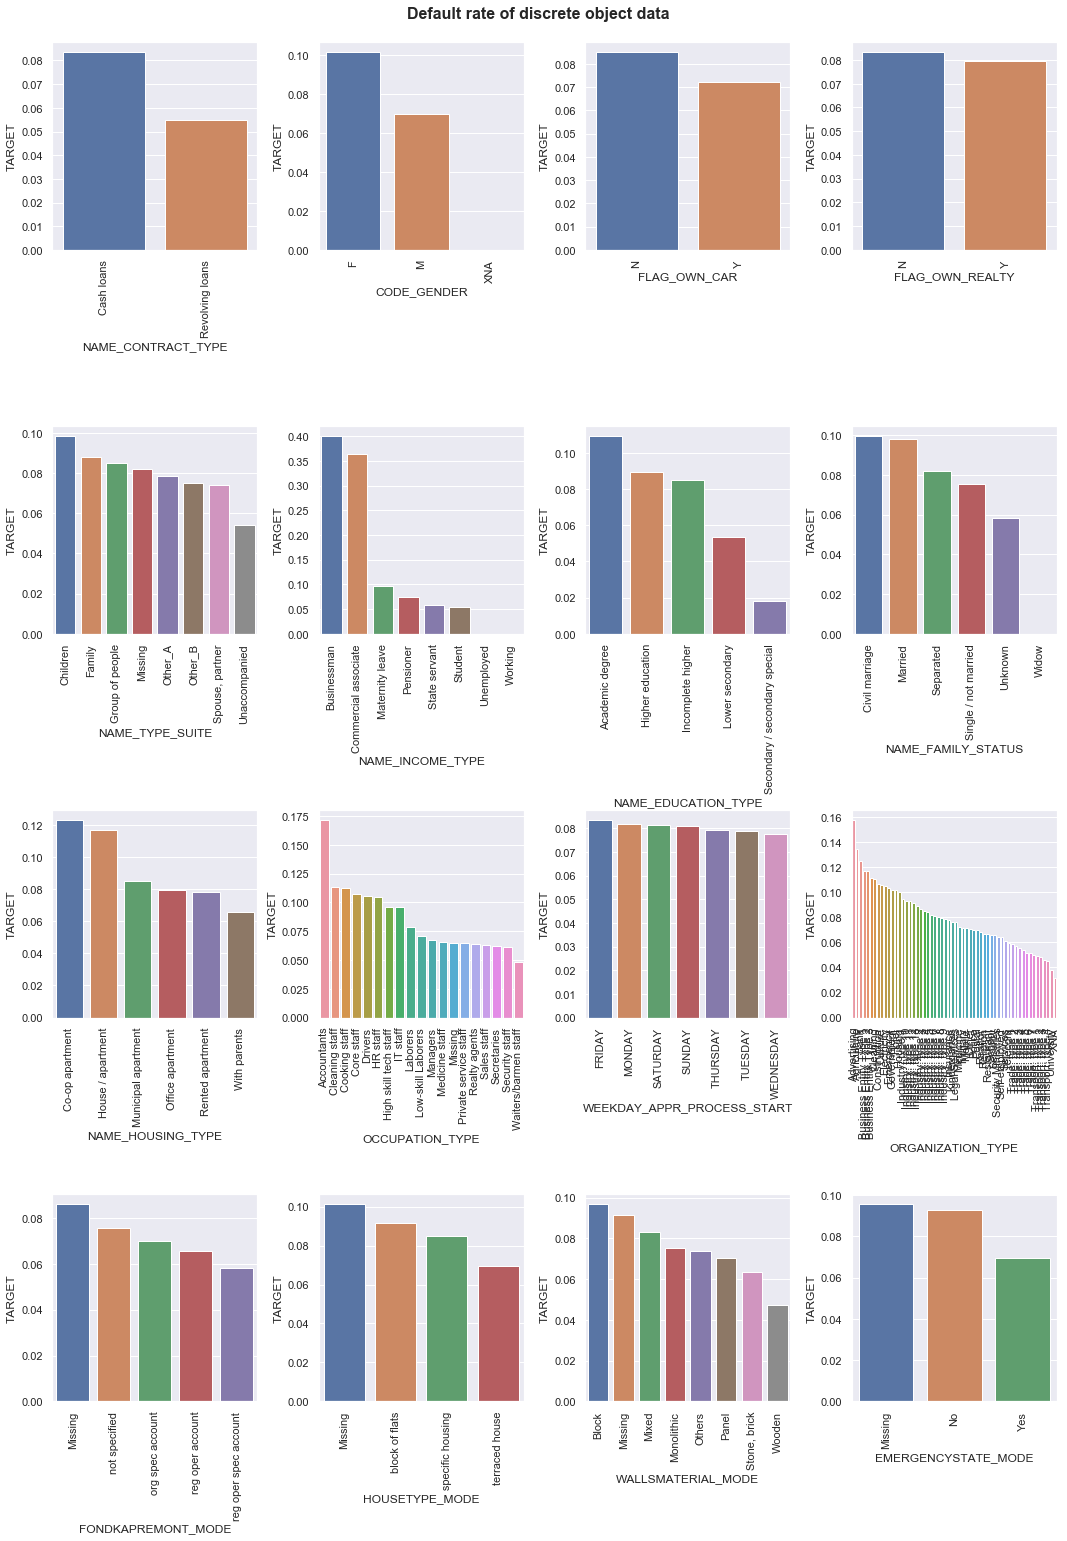

In [123]:
i = j = k = 0
fig, ax = plt.subplots(4,4, figsize=(18,25))
fig.suptitle('Default rate of discrete object data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.85, wspace=0.3)
for attr in train_object.columns:
    sns.barplot(x=aa.groupby(attr).mean().index, 
                y=aa.groupby(attr).mean().TARGET.sort_values(ascending=False), ax=ax[i,j]);
    ax[i,j].tick_params('x', labelrotation=90)
    if j==3:
        i+=1
        j=0
    else:
        j+=1
    k+=1

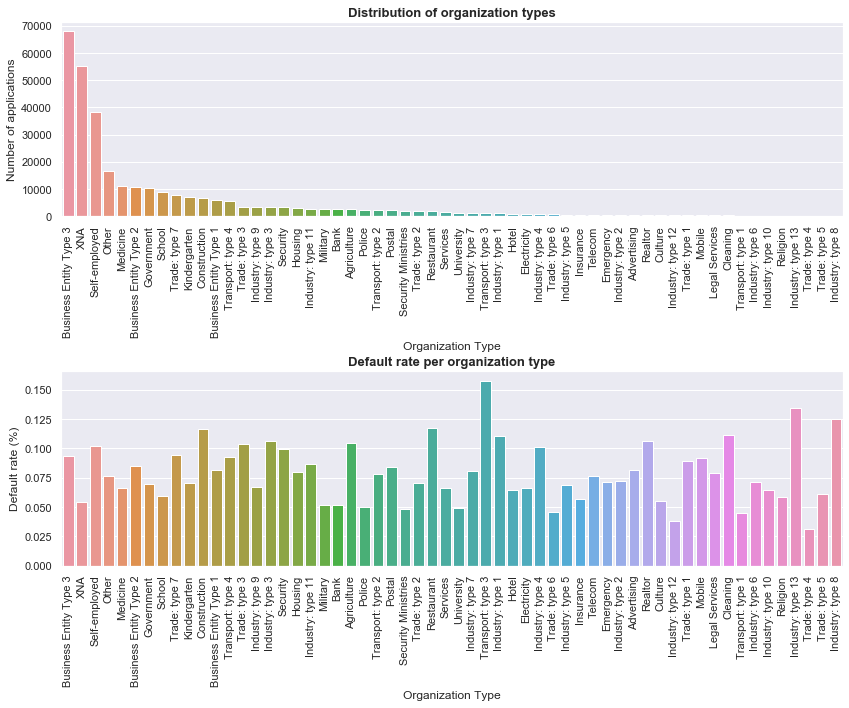

In [124]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.countplot(x='ORGANIZATION_TYPE', data=aa, order=aa['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of organization types', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Number of applications')
plt.xlabel('Organization Type')

plt.subplot(2,1,2)
sns.barplot(x=aa.groupby('ORGANIZATION_TYPE').mean().index, 
            y=aa.groupby('ORGANIZATION_TYPE').mean().TARGET, order=aa['ORGANIZATION_TYPE'].value_counts().index) #.sort_values(ascending=False)
plt.xticks(rotation=90)
plt.title('Default rate per organization type', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Default rate (%)')
plt.xlabel('Organization Type')

plt.subplots_adjust(hspace=0.8);
#plt.tight_layout()
#plt.show();

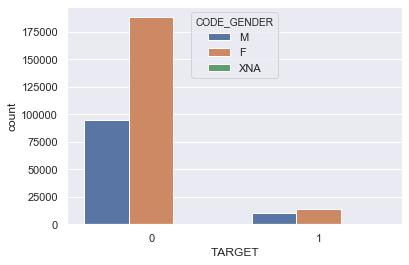

In [125]:
sns.countplot(x='TARGET', hue='CODE_GENDER', data=aa);

### Discrete Numeric Data

In [126]:
bb = train_clean[train_discrete_numeric]
bb.head()

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,1,0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [127]:
bb.shape

(307511, 45)

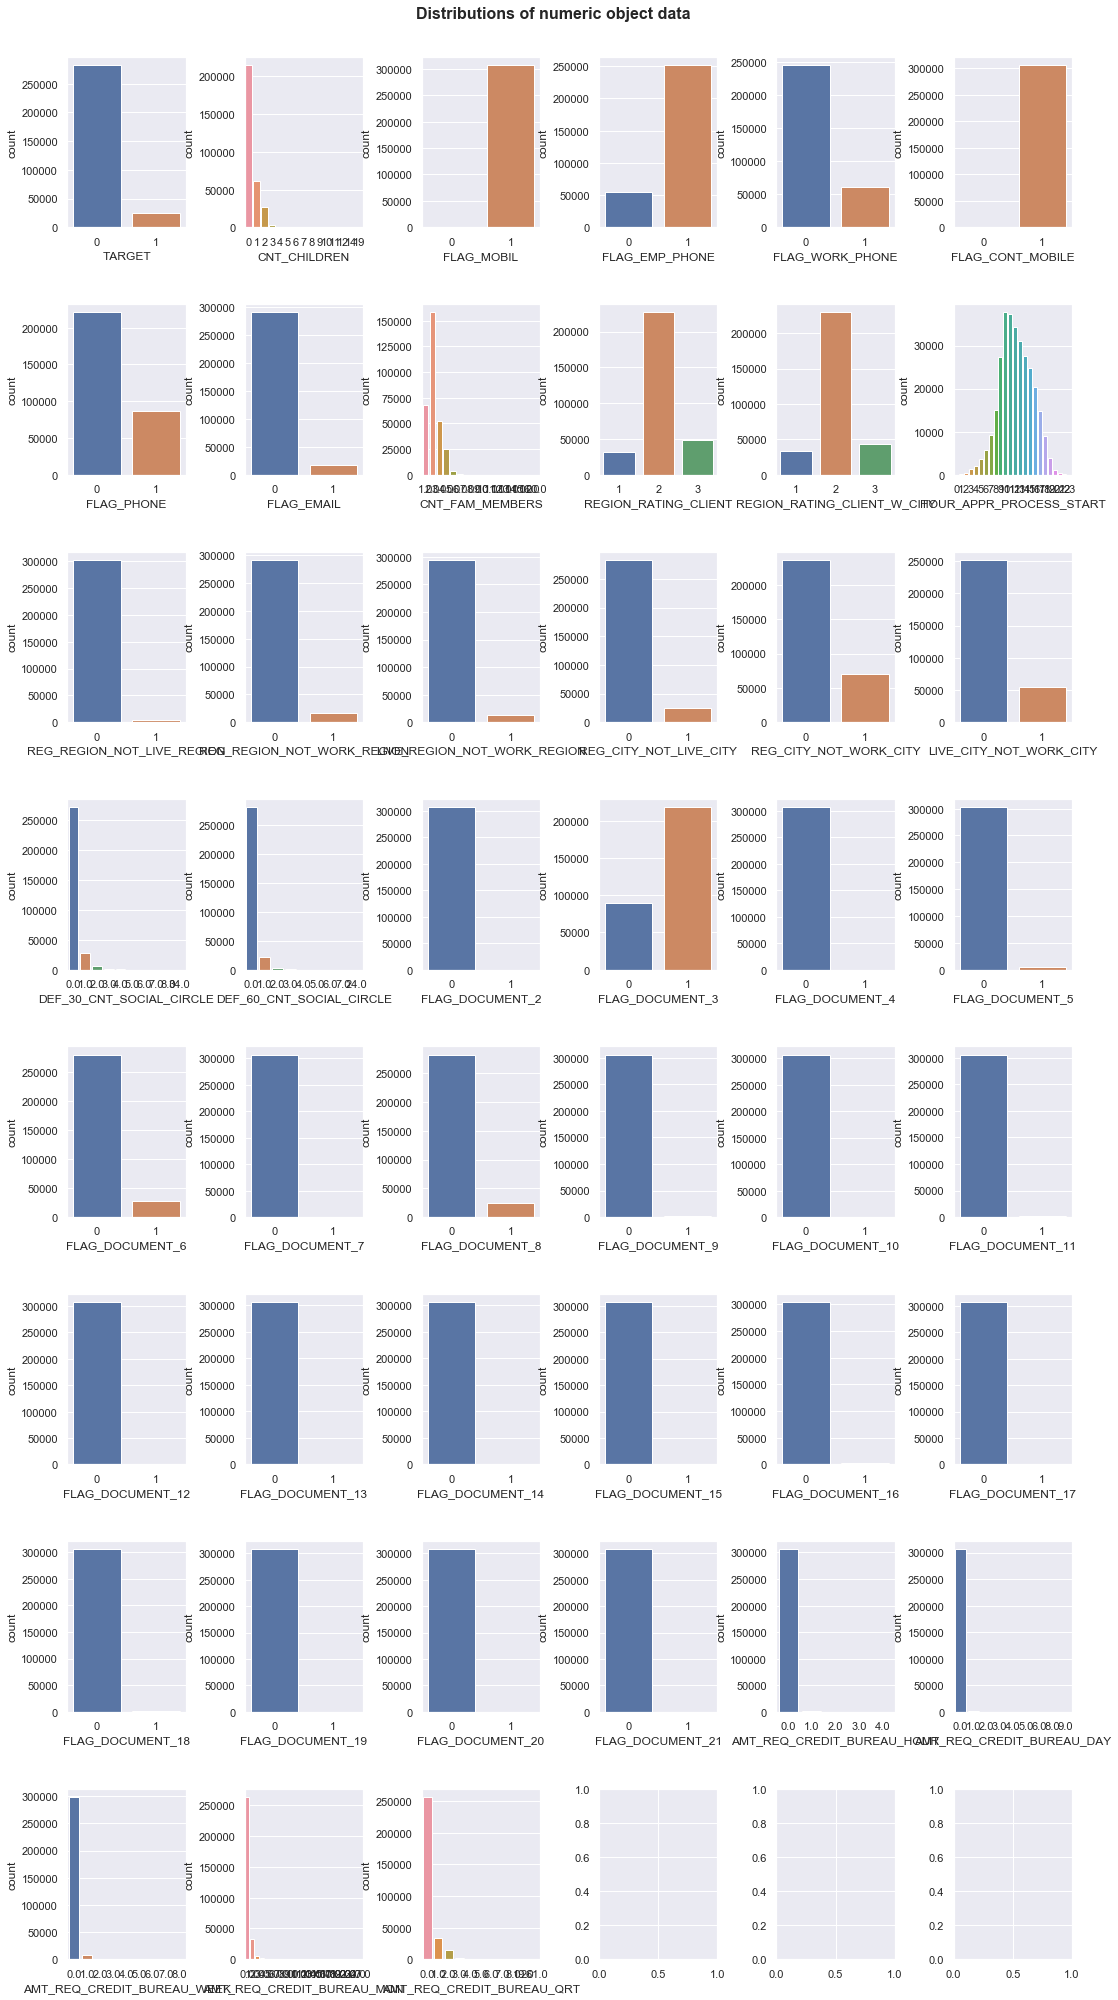

In [128]:
i = j = k = 0
fig, ax = plt.subplots(8,6, figsize=(18,35))
fig.suptitle('Distributions of numeric object data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.45, wspace=0.5)
for attr in train_discrete_numeric:
    sns.countplot(x=attr, data=train_clean, ax=ax[i,j])
    if j==5:
        i+=1
        j=0
    else:
        j+=1
    k+=1

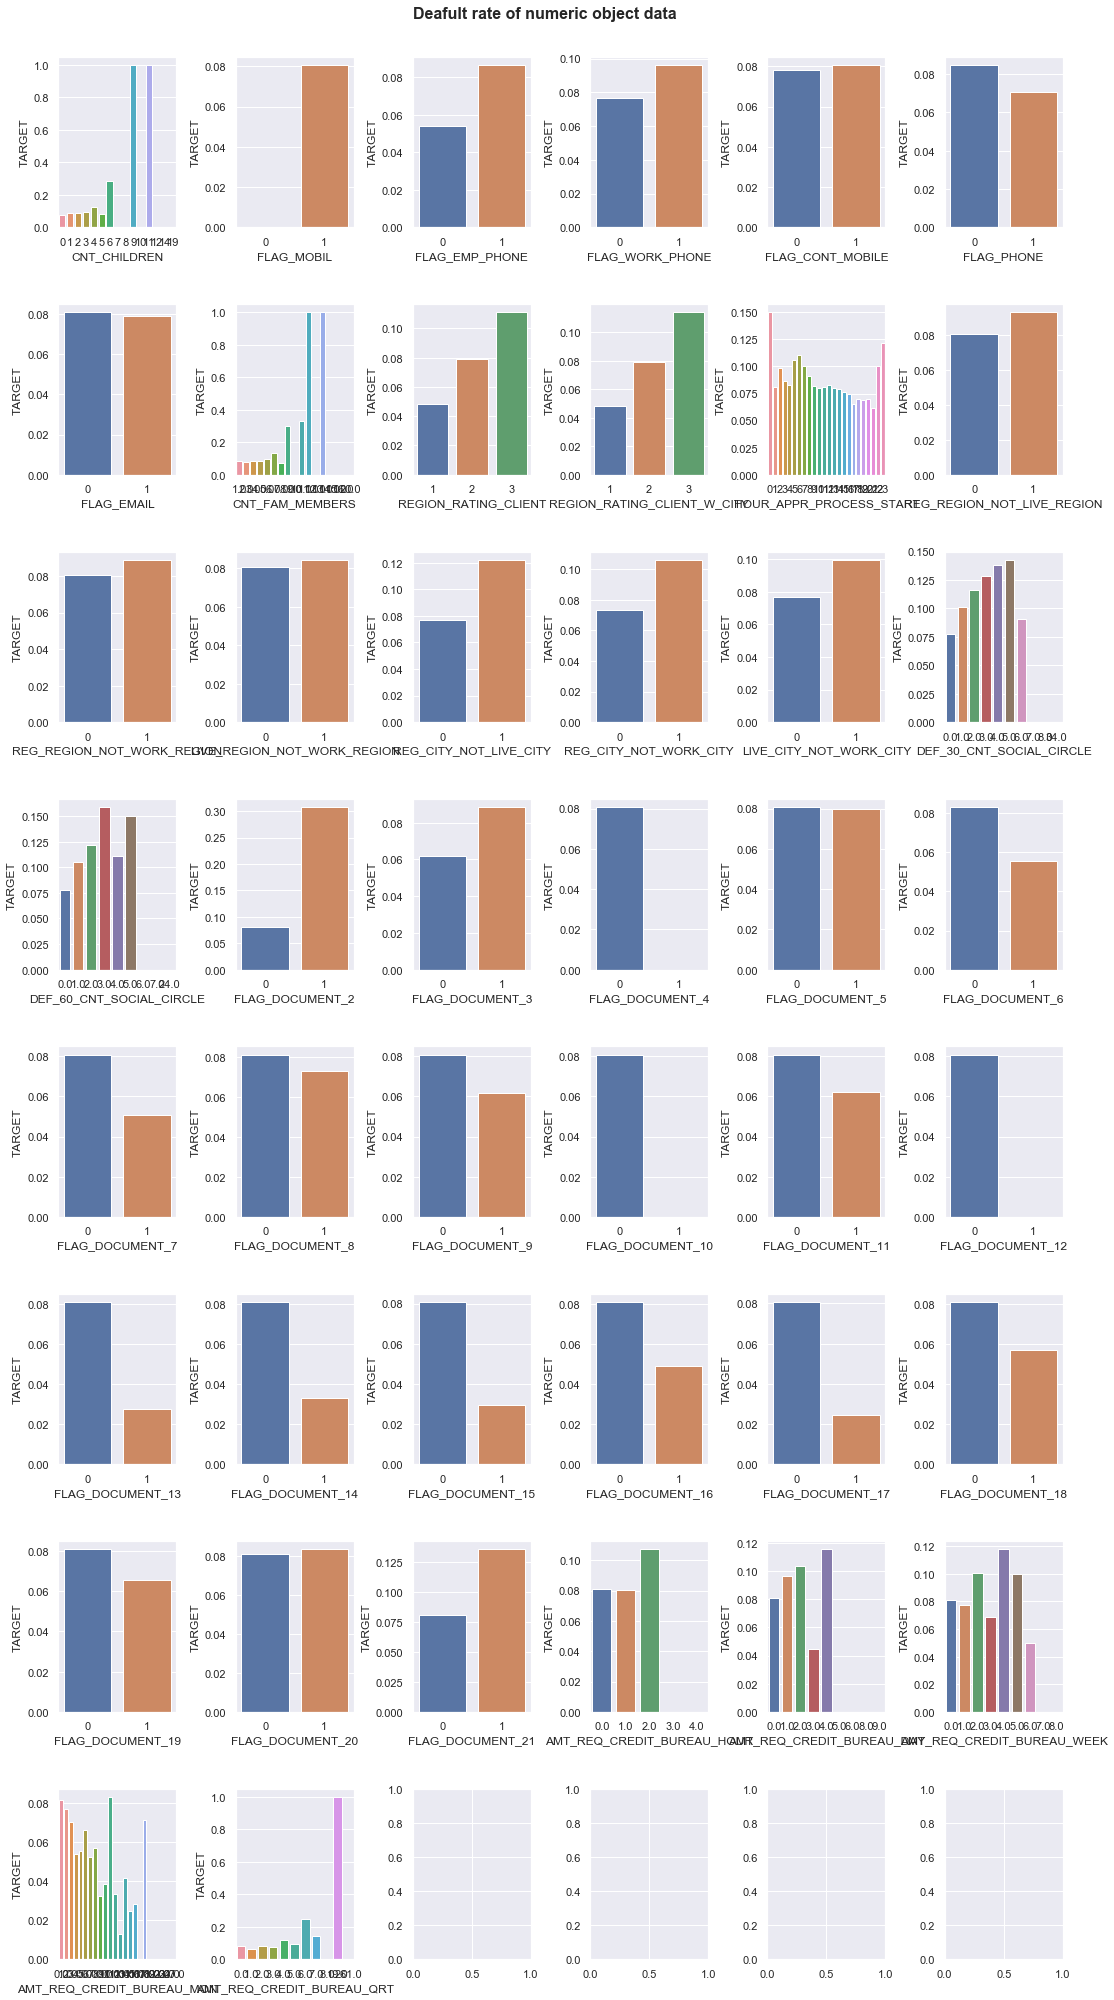

In [129]:
i = j = k = 0
fig, ax = plt.subplots(8,6, figsize=(18,35))
fig.suptitle('Deafult rate of numeric object data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.45, wspace=0.5)
for attr in train_discrete_numeric:
    if attr=='TARGET':
        continue
    sns.barplot(x=bb.groupby(attr).mean().index, 
                y=bb.groupby(attr).mean().TARGET, ax=ax[i,j])
    
    if j==5:
        i+=1
        j=0
    else:
        j+=1
    k+=1

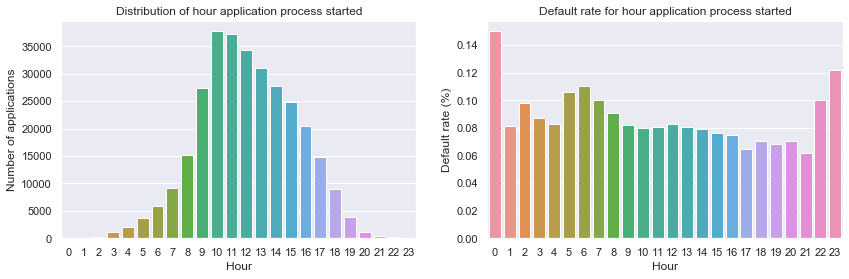

In [130]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='HOUR_APPR_PROCESS_START', data=bb)
plt.title('Distribution of hour application process started')
plt.ylabel('Number of applications')
plt.xlabel('Hour')

plt.subplot(1,2,2)
sns.barplot(x=bb.groupby('HOUR_APPR_PROCESS_START').mean().index,
            y=bb.groupby('HOUR_APPR_PROCESS_START').mean().TARGET) #.sort_values(ascending=False)
plt.title('Default rate for hour application process started')
plt.ylabel('Default rate (%)')
plt.xlabel('Hour');

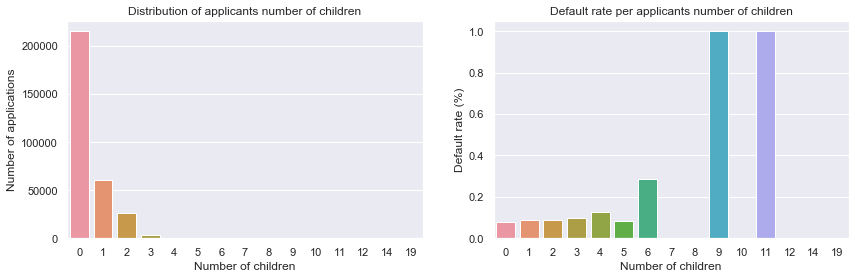

In [131]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='CNT_CHILDREN', data=bb)
plt.title('Distribution of applicants number of children')
plt.ylabel('Number of applications')
plt.xlabel('Number of children')

plt.subplot(1,2,2)
sns.barplot(x=bb.groupby('CNT_CHILDREN').mean().index,
            y=bb.groupby('CNT_CHILDREN').mean().TARGET) #.sort_values(ascending=False)
plt.title('Default rate per applicants number of children')
plt.ylabel('Default rate (%)')
plt.xlabel('Number of children');

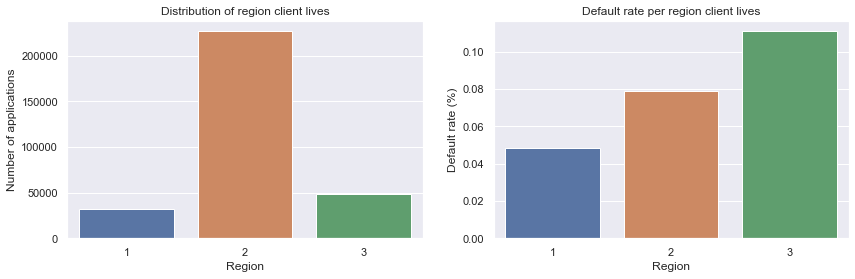

In [132]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='REGION_RATING_CLIENT', data=bb)
plt.title('Distribution of region client lives')
plt.ylabel('Number of applications')
plt.xlabel('Region')

plt.subplot(1,2,2)
sns.barplot(x=bb.groupby('REGION_RATING_CLIENT').mean().index,
            y=bb.groupby('REGION_RATING_CLIENT').mean().TARGET) #.sort_values(ascending=False)
plt.title('Default rate per region client lives')
plt.ylabel('Default rate (%)')
plt.xlabel('Region');

### Continuous Numeric Data

In [133]:
len(train_continuous)

57

In [134]:
"""
plt.figure(figsize=(9,5))
sns.distplot(train_clean[train_clean.TARGET==0].AMT_INCOME_TOTAL, bins=1000, label='Target 0')
sns.distplot(train_clean[train_clean.TARGET==1].AMT_INCOME_TOTAL, bins=4000, label='Target 1')
plt.title('Distribution of income', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 600000);
"""

"\nplt.figure(figsize=(9,5))\nsns.distplot(train_clean[train_clean.TARGET==0].AMT_INCOME_TOTAL, bins=1000, label='Target 0')\nsns.distplot(train_clean[train_clean.TARGET==1].AMT_INCOME_TOTAL, bins=4000, label='Target 1')\nplt.title('Distribution of income', fontdict={'fontsize':13, 'fontweight':'bold'})\nplt.xlabel('Income')\nplt.ylabel('Density')\nplt.legend()\nplt.xlim(0, 600000);\n"

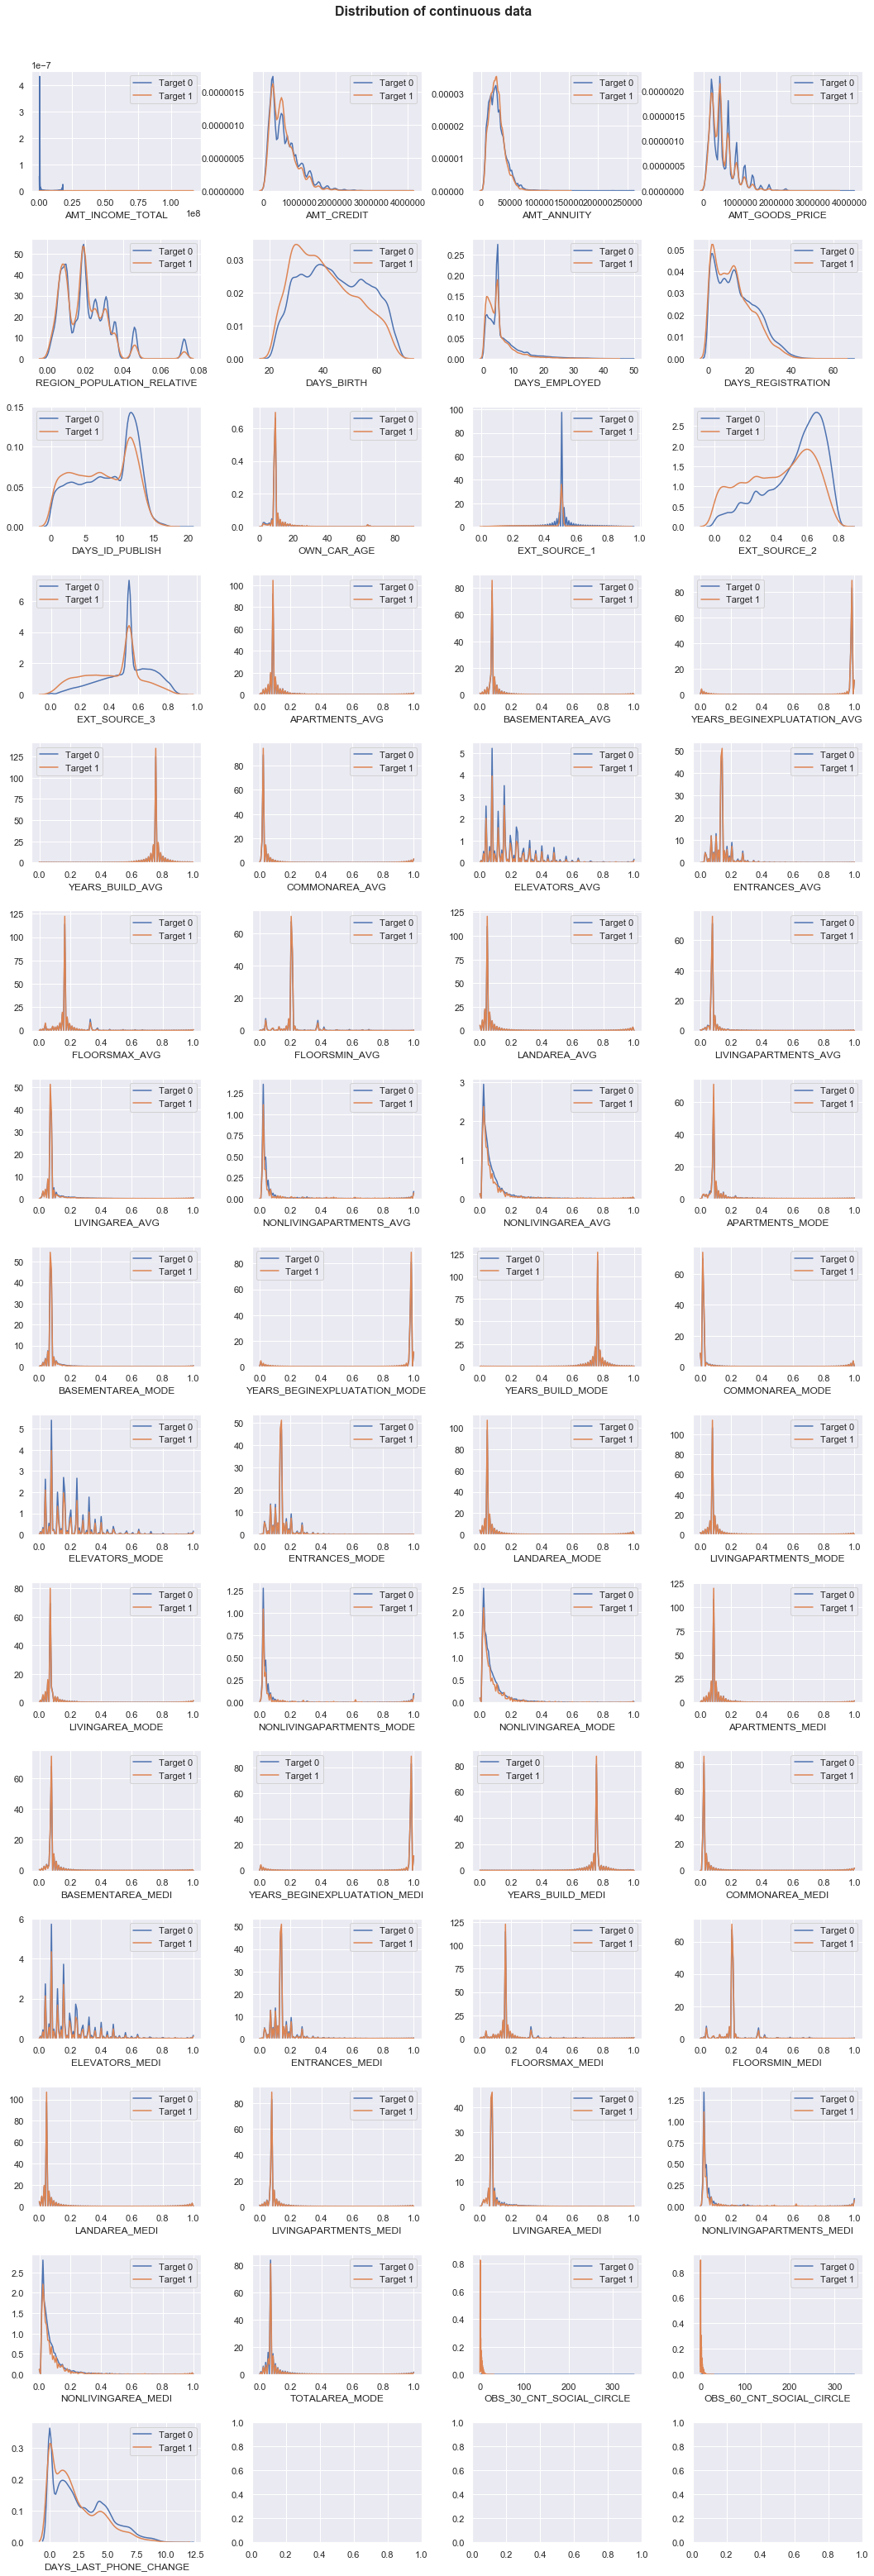

In [137]:
i = j = k = 0
fig, ax = plt.subplots(15,4, figsize=(18,55))
fig.suptitle('Distribution of continuous data', fontsize=16, fontweight = 'bold', y=0.9)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for attr in train_continuous:
    #print(k)
    sns.kdeplot(train_clean[train_clean.TARGET==0][attr], label='Target 0', ax=ax[i,j])
    sns.kdeplot(train_clean[train_clean.TARGET==1][attr], label='Target 1', ax=ax[i,j])
    ax[i,j].set_xlabel(attr)
    if j==3:
        i+=1
        j=0
    else:
        j+=1
    k+=1

## Data Preprocessing

### Transform skewed features

In [148]:
train_skewed = train_clean.skew().sort_values(ascending=False)
train_skewed

FLAG_DOCUMENT_12                392.114779
AMT_INCOME_TOTAL                391.559654
FLAG_DOCUMENT_10                209.589054
FLAG_DOCUMENT_2                 153.791817
AMT_REQ_CREDIT_BUREAU_QRT       141.400915
FLAG_DOCUMENT_4                 110.894364
FLAG_DOCUMENT_7                  72.174108
FLAG_DOCUMENT_17                 61.214140
FLAG_DOCUMENT_21                 54.612939
FLAG_DOCUMENT_20                 44.364897
FLAG_DOCUMENT_19                 40.956134
NONLIVINGAPARTMENTS_MODE         29.126091
AMT_REQ_CREDIT_BUREAU_DAY        29.081577
FLAG_DOCUMENT_15                 28.699333
NONLIVINGAPARTMENTS_MEDI         28.058040
NONLIVINGAPARTMENTS_AVG          27.815392
FLAG_DOCUMENT_14                 18.372533
FLAG_DOCUMENT_13                 16.753746
FLAG_DOCUMENT_9                  15.927755
FLAG_DOCUMENT_11                 15.894229
AMT_REQ_CREDIT_BUREAU_HOUR       15.641990
OBS_30_CNT_SOCIAL_CIRCLE         12.143796
OBS_60_CNT_SOCIAL_CIRCLE         12.075153
FLAG_DOCUME

### Logarithmic transformation for features with higher than 0.2 skewness

In [149]:
skewed_index = train_skewed[abs(train_skewed) > 0.2].index

In [150]:
train_clean_log = train_clean.copy()
test_clean_log = test_clean.copy()

In [151]:
test_clean_log.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52.715068,6.380822,14.164384,2.224658,9.0,1,1,0,1,0,1,Missing,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,0.7552,0.0227,0.00,0.1379,0.1250,0.2083,0.0483,0.0756,0.0505,0.0000,0.0038,0.0672,0.0612,0.9732,0.7583,0.0203,0.0000,0.1379,0.1250,0.2083,0.0462,0.0817,0.0526,0.0000,0.0012,0.0666,0.0590,0.9732,0.7585,0.0223,0.00,0.1379,0.1250,0.2083,0.0488,0.0770,0.0514,0.0000,0.0031,Missing,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,4.767123,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49.490411,12.243836,24.980822,4.446575,9.0,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0.0462,0.0817,0.0751,0.0000,0.0012,0.0926,0.0778,0.9816,0.7585,0.0223,0.00,0.1379,0.1667,0.2083,0.0488,0.0770,0.0776,0.0000,0.0031,Missing,Missing,0.0707,Missing,Missing,0.0,0.0,0.0,0.0,-0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Missing,Working,Higher education,Married,House / apartment,0.019101,54.898630,12.213699,5.958904,9.597260,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.506771,0.699787,0.610991,0.0928,0.0781,0.9816,0.7552,0.0227,0.00,0.1379,0.1667,0.2083,0.0483,0.0756,0.0770,0.0000,0.0038,0.0851,0.0770,0.9816,0.7583,0.0203,0.0000,0.1379,0.1667,0.2083,0

In [152]:
#features_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

In [153]:
#train_clean_log[features_negative] = train_clean_log[features_negative] * (-1)
#test_clean_log[features_negative] = test_clean_log[features_negative] * (-1)

In [154]:
train_clean_log[skewed_index] = train_clean_log[skewed_index].apply(lambda x: np.log(x + 1))
test_clean_log[skewed_index] = test_clean_log[skewed_index].apply(lambda x: np.log(x + 1))

In [155]:
#from sklearn.preprocessing import FunctionTransformer

In [156]:
#log_transf = FunctionTransformer(np.log1p, validate=True)

In [157]:
#train_clean_log[skewed_index] = log_transf.fit_transform(train_clean_log[skewed_index])

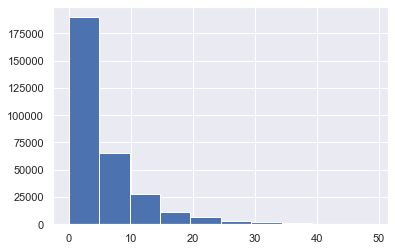

In [158]:
train_clean.DAYS_EMPLOYED.hist();

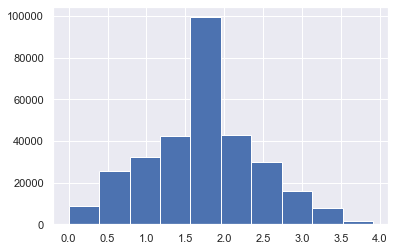

In [159]:
train_clean_log.DAYS_EMPLOYED.hist();

### Normalize data

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()

In [162]:
numeric_data = train_clean_log.select_dtypes(np.number)

In [163]:
train_clean_normalized = train_clean_log.copy()
test_clean_normalized = test_clean_log.copy()

In [164]:
train_clean_normalized[numeric_data.columns] = scaler.fit_transform(train_clean_normalized[numeric_data.columns])
test_clean_normalized[numeric_data.columns] = scaler.fit_transform(test_clean_normalized[numeric_data.columns])

In [165]:
train_clean_normalized.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.084492,0.208526,0.523506,0.528241,0.510615,0.290817,0.481849,0.438041,0.565311,0.681344,0.504993,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,0.176760,0.526232,0.515760,0.524496,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.516538,0.657733,0.638705,0.137459,0.111293,0.984727,0.809812,0.039081,0.046715,0.191339,0.253830,0.278182,0.076451,0.114289,0.122246,0.003523,0.019759,0.132997,0.109393,0.984373,0.817084,0.036182,0.044070,0.188447,0.251515,0.276726,0.073787,0.117528,0.120312,0.003225,0.016908,0.136870,0.110640,0.984719,0.812543,0.038771,0.046181,0.191002,0.253576,0.278056,0.077366,0.115206,0.123216,0.00

## Object data - Dummy variables

In [166]:
train_clean_normalized.shape, test_clean_normalized.shape

((307511, 120), (48744, 120))

In [167]:
train_final = pd.get_dummies(train_clean_normalized)

In [168]:
test_final = pd.get_dummies(test_clean_normalized)

In [169]:
train_final.shape, test_final.shape

((307511, 250), (48744, 247))

In [170]:
# Align train and test sets
train_final, test_final = train_final.align(test_final, join = 'inner', axis = 1)

In [171]:
train_final.shape, test_final.shape

((307511, 247), (48744, 247))

In [200]:
train_final['TARGET'] = train_target

In [201]:
train_final.shape, test_final.shape

((307511, 248), (48744, 247))

In [203]:
train_final.to_csv('data/train_final.csv', index=False)
test_final.to_csv('data/test_final.csv', index=False)

## Shuffle and Split Data

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_final, 
                                                    train_target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Test set has {} samples.".format(X_test.shape[0]))

Training set has 246008 samples.
Test set has 61503 samples.


- Impute median
- Transform skewed features
- Normalize
- Create dummy variables
- Allign train and test sets
- (Perform EDA)
- Feature reduction / PCA
- Polynomial feature engineering


Try cases:
- Dataset that keeps all features
- Dataset that drops features with many missing values
- PCA